In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# read data (replace with your own path)
df = pd.read_csv('winequality-red.csv', sep=';')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [2]:
def function(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    # build and fit model
    reg = linear_model.LinearRegression()
    reg.fit(X_train,Y_train)

    # output model
    print("Coefficients:" ,reg.coef_)
    print("Intercept:", reg.intercept_)

    # compute predicted values
    Y_pred = reg.predict(X_test)

    # compute error statistics
    mse = mean_squared_error(Y_test, Y_pred)
    r2s = r2_score(Y_test, Y_pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    return reg.coef_

In [3]:
from sklearn.model_selection import train_test_split
# split into explanatory and response variables 
X = df.iloc[:,1:11]
Y = df.iloc[:,11]
coef1 = function(X,Y)

Coefficients: [-1.13089899e+00 -2.68085203e-01  1.70775686e-02 -2.00554732e+00
  6.68322357e-03 -3.47665479e-03  6.15893364e+00 -4.39733308e-01
  7.32699979e-01  2.78953366e-01]
Intercept: -1.5836520804519045
MSE =  0.4693457502988979
R2s =  0.3670409211393665


In [4]:
# standarise variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
X = dfn.iloc[:,1:11]
Y = dfn.iloc[:,11]
coef = function(X,Y)

Coefficients: [-0.23659923 -0.01984458  0.0198021  -0.11531821  0.07717716 -0.13108709
 -0.0030165  -0.11035072  0.16312471  0.40028973]
Intercept: -0.01835878272392963
MSE =  0.6410463168005248
R2s =  0.3779482977096964


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


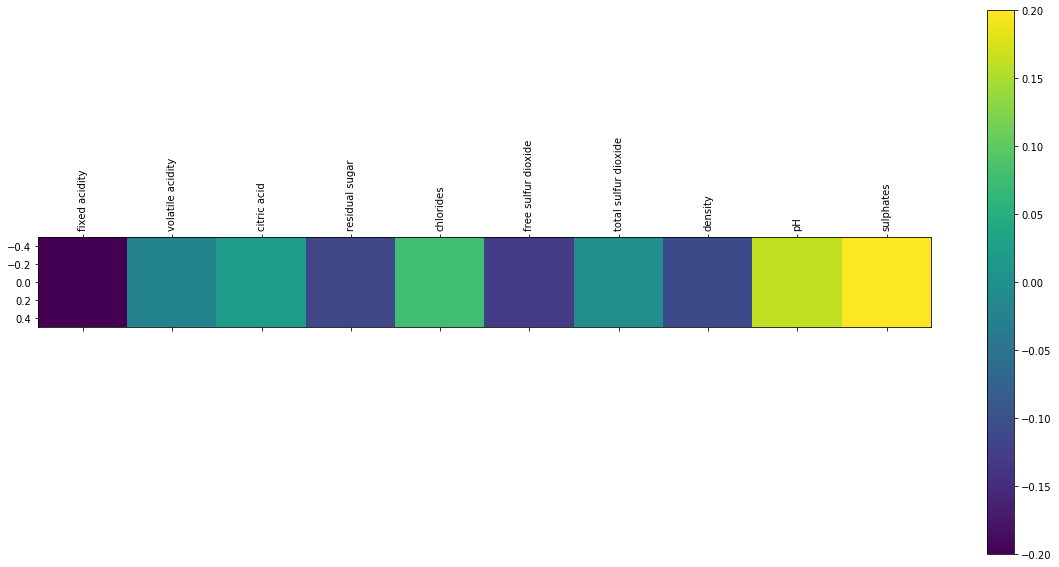

'\nplt.figure(figsize=(20,10))\ncoef2 = pd.DataFrame(coef.reshape(1,10))\nprint(coef2.shape)\ncax = plt.matshow(coef2.reshape(1,10), vmin=-0.2, vmax=0.2)\nplt.colorbar(cax)\nba = plt.bar(names, abs(coef))\ndef autolabel(rects):\n    """\n    Attach a text label above each bar displaying its height\n    """\n    for rect in rects:\n        height = rect.get_height()\n        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,\n                \'%.3f\' % float(height),\n                ha=\'center\', va=\'bottom\')\nautolabel(ba)\n#plt.colorbar()\nplt.grid()'

In [6]:
import matplotlib.pyplot as plt


dfn = df.drop(["alcohol","quality"],axis = 1)
names = dfn.columns.get_values()
colors = ['r','b']


# visualize with matplotlib
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(coef.reshape(1,10), vmin=-0.2, vmax=0.2)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(names)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#ax.set_yticklabels(names)
#plt.savefig('heatmap_arvostukset_clusters_'+str(num_clusters)+'.png',bbox_inches='tight')
plt.show()

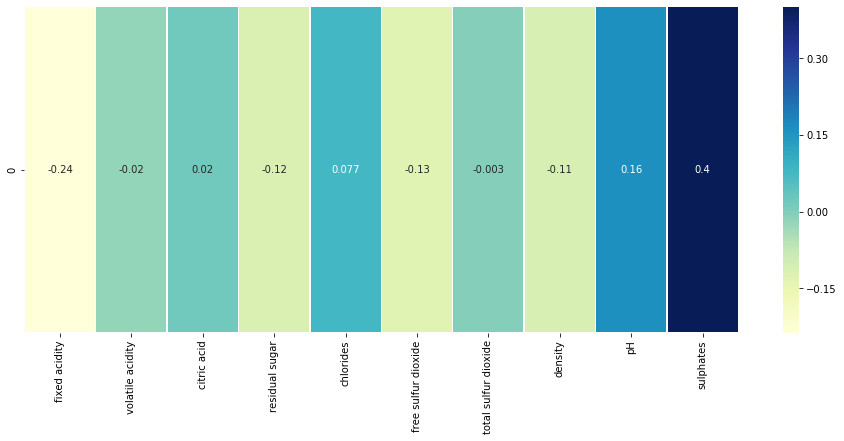

In [41]:
dfn = df.drop(["alcohol","quality"],axis = 1)
names = dfn.columns.get_values()
colors = ['r','b']

coef2 = pd.DataFrame(coef.reshape(1,10))
coef2.columns=names
import seaborn as sns
plt.figure(figsize=(16, 6))
data = np.random.rand(1,10)
sns.heatmap(coef2, annot=True,  linewidths=.5,cmap="YlGnBu")

#ba = plt.bar(names, abs(coef))

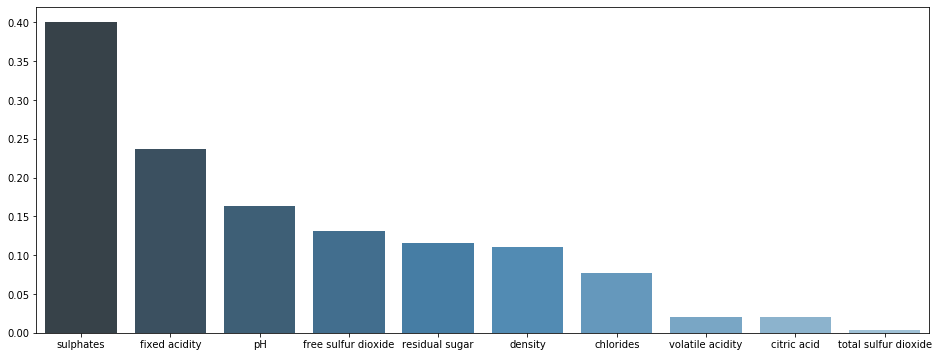

In [68]:
#coef2 = pd.DataFrame(coef.reshape(1,10))
coef2=abs(coef2.sort_values(by=0, ascending=False, axis=1))
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=coef2,palette="Blues_d")